In [1]:
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
# NOTE:
# I am aware of this method not producing appropriate plots. 
# The plots should indicate that as t -> inf, r(t) -> N (which we can intepret as the population gaing some kind of immunity)
# 

In [42]:
def euler_step_SIR(s_n,i_n,r_n,t_n,s,h):
    return s_n+h*s(t_n,s_n,i_n,r_n)

In [65]:
def euler_method_SIR(t_0,s_0,i_0,r_0,s,i,r,h,N):
    time=[]
    s_list =[]
    i_list =[]
    r_list =[]

    s_n = s_0
    i_n = i_0
    r_n = r_0

    t_n = t_0
    
    step = 1
    while step <=N:
        s_n = euler_step_SIR(s_n,i_n,r_n,t_n,s,h)
        i_n = euler_step_SIR(s_n,i_n,r_n,t_n,i,h)
        r_n = euler_step_SIR(s_n,i_n,r_n,t_n,r,h)
        
        t_n = t_n+h
        time.append(t_n)
        
        s_list.append(s_n)
        i_list.append(i_n)
        r_list.append(r_n)

        step+=1
        
    return [s_list,i_list,r_list, time]

In [74]:
def plot_SIR_model (delta,gamma, s_0,i_0,r_0,N, iterations):
    def s(t,s_t,i_t,r_t):
        return  -delta * s_t * i_t  / N
    def i(t,s_t,i_t,r_t):
        return 1/N * (delta* s_t*i_t - gamma*i_t)
    def r(t,s_t,i_t,r_t):
        return gamma * i_t 
    
    result = euler_method_SIR(0,s_0,i_0,r_0,s,i,r,0.5,iterations)
    res_s = result[0]
    res_i = result[1]
    res_r = result[2]
    res_t = result[3]
    
    plt.plot(res_t, res_s, color ='r')
    plt.plot(res_t, res_i, color ='b')
    plt.plot(res_t, res_r, color='y')
    plt.show()



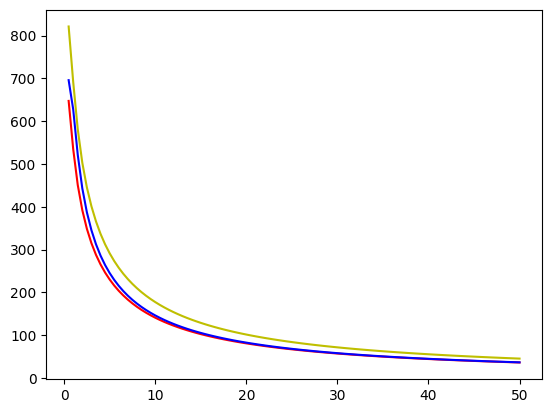

In [80]:
plot_SIR_model(0.5,0.5,700,300,0,1000,100)


In [81]:
# Varying of parametres delta and gamma

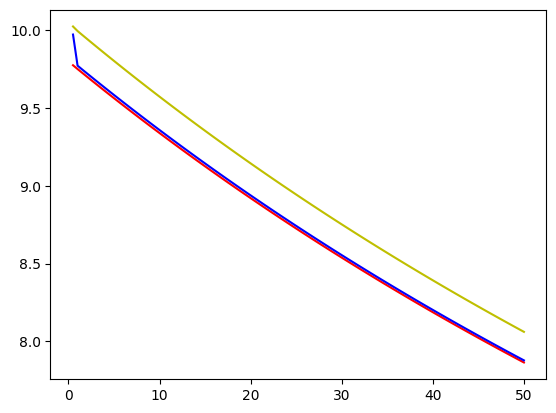

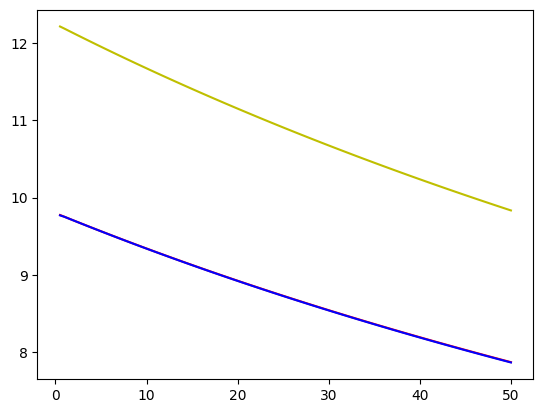

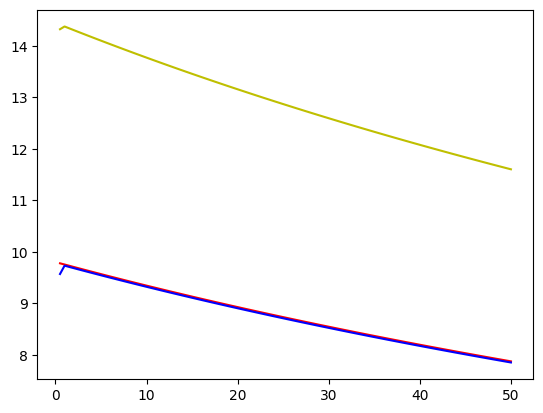

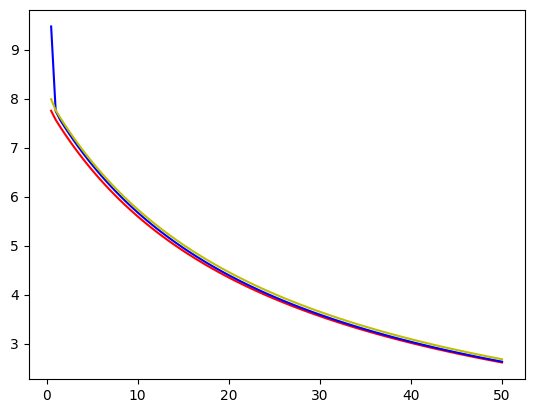

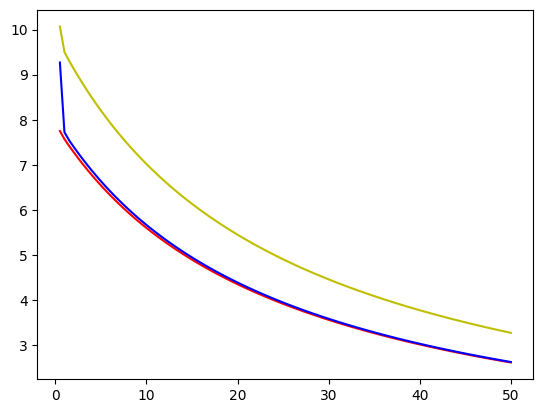

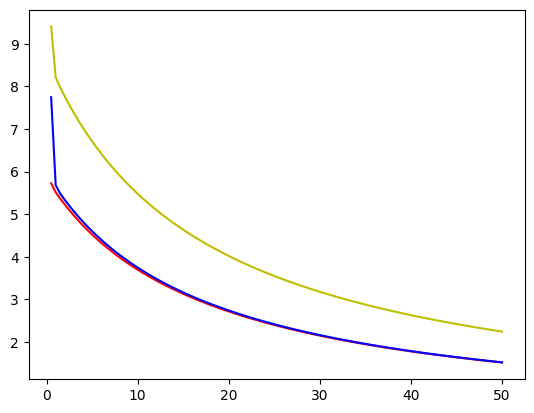

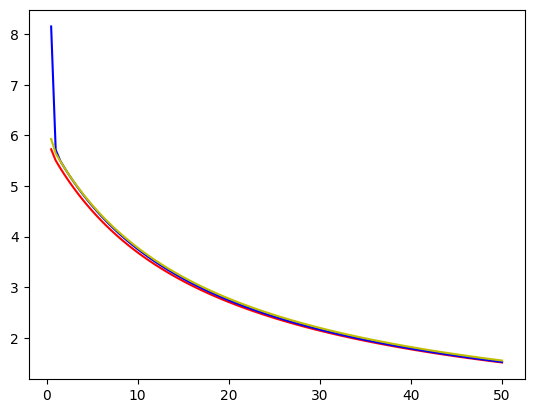

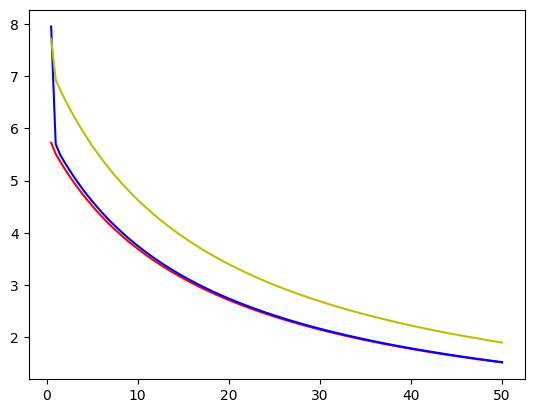

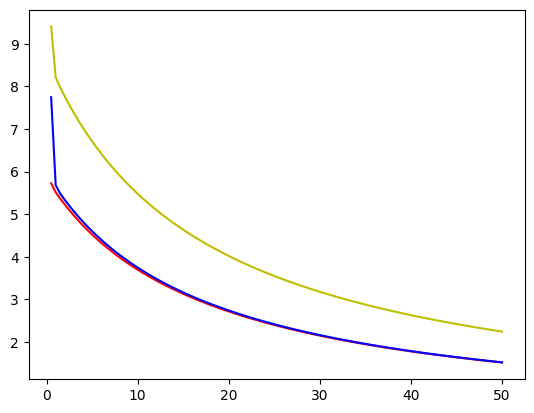

In [82]:
plot_SIR_model(0.05,0.05,10,90,0,100,100)
plot_SIR_model(0.05,0.5,10,90,0,100,100)
plot_SIR_model(0.05,0.95,10,90,0,100,100)
plot_SIR_model(0.5,0.05,10,90,0,100,100)
plot_SIR_model(0.5,0.5,10,90,0,100,100)
plot_SIR_model(0.95,0.95,10,90,0,100,100)
plot_SIR_model(0.95,0.05,10,90,0,100,100)
plot_SIR_model(0.95,0.5,10,90,0,100,100)
plot_SIR_model(0.95,0.95,10,90,0,100,100)
